In [57]:
from src.dataloader import *
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from torchvision import transforms, datasets
import torch.nn as nn
import tensorflow as tf
import cv2
import random

# Statistiques descriptives sur les images brutes

(J'ai resize les images pour des problèmes de RAM mais en théorie il faut garder les dimensions 400*400)

In [58]:
tf.random.set_seed(42)

label_attribution = LabelAttribution(path_image_google="C:/Users/yanis/OneDrive/Documents/Projet Stat/Données/bdappv/google/img/",
                                     path_mask_google='C:/Users/yanis/OneDrive/Documents/Projet Stat/Données/bdappv/google/mask/',
                                     path_metadata='C:/Users/yanis/OneDrive/Documents/Projet Stat/Données/bdappv/metadata.csv',
                                     colonne_identifiant='identifiant',
                                     path_export_train_test="C:/Users/yanis/OneDrive/Documents/Projet Stat/statapps",
                                     path_image_ign='C:/Users/yanis/OneDrive/Documents/Projet Stat/Données/bdappv/ign/img',
                                     path_mask_ign='C:/Users/yanis/OneDrive/Documents/Projet Stat/Données/bdappv/ign/mask/',
                                     use_img_google=True,
                                     use_img_ign=False
                                     )
label_attribution.run()

path_train = "C:/Users/yanis/OneDrive/Documents/Projet Stat/statapps/train_data.csv"
path_test = "C:/Users/yanis/OneDrive/Documents/Projet Stat/statapps/test_data.csv"

transformed_train_dataset = CustomImageDataset(path_train, "C:/Users/yanis/OneDrive/Documents/Projet Stat/Données/bdappv/google/img/", transform=transforms.Compose([
    transforms.Resize(28),
    transforms.ToTensor(),
]))
transformed_test_dataset = CustomImageDataset(path_test, "C:/Users/yanis/OneDrive/Documents/Projet Stat/Données/bdappv/google/img/",
                                              transform=transforms.Compose([
                                                  transforms.Resize(28),
                                                  transforms.ToTensor(),
                                              ]))

print("Nombre d'images dans le train: {}".format(transformed_train_dataset.__len__()))
print("Nombre d'images dans le test: {}".format(transformed_test_dataset.__len__()))

train_dataloader = DataLoader(
    transformed_train_dataset, batch_size=23045, shuffle=True)
test_dataloader = DataLoader(
    transformed_test_dataset, batch_size=5762, shuffle=True)

X_train, Y_train = next(iter(train_dataloader))
X_test, Y_test = next(iter(test_dataloader))

X_train_permute = X_train.permute(0, 2, 3, 1)
X_test_permute = X_test.permute(0, 2, 3, 1)

print("Nombre de labels positifs dans le train: {}".format(int(torch.count_nonzero(Y_train))))
print("Part de labels positifs dans le train: {}%".format(round((int(torch.count_nonzero(Y_train))*100)/transformed_train_dataset.__len__()),2))

print("Nombre de labels positifs dans le test: {}".format(int(torch.count_nonzero(Y_test))))
print("Part de labels positifs dans le test: {}%".format(round((int(torch.count_nonzero(Y_test))*100)/transformed_test_dataset.__len__()),2))


Nombre d'images dans le train: 23045
Nombre d'images dans le test: 5762
Nombre de labels positifs dans le train: 12215
Part de labels positifs dans le train: 53%
Nombre de labels positifs dans le test: 3115
Part de labels positifs dans le test: 54%


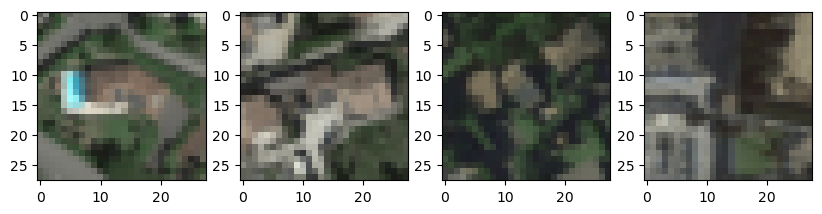

In [59]:
fig, axs = plt.subplots(1, 4, figsize=(10, 10))

random_idx=random.sample(range(23045), 4)

axs[0].imshow(X_train_permute[random_idx[0]].numpy())
axs[1].imshow(X_train_permute[random_idx[1]].numpy())
axs[2].imshow(X_train_permute[random_idx[2]].numpy())
axs[3].imshow(X_train_permute[random_idx[3]].numpy())

plt.show()

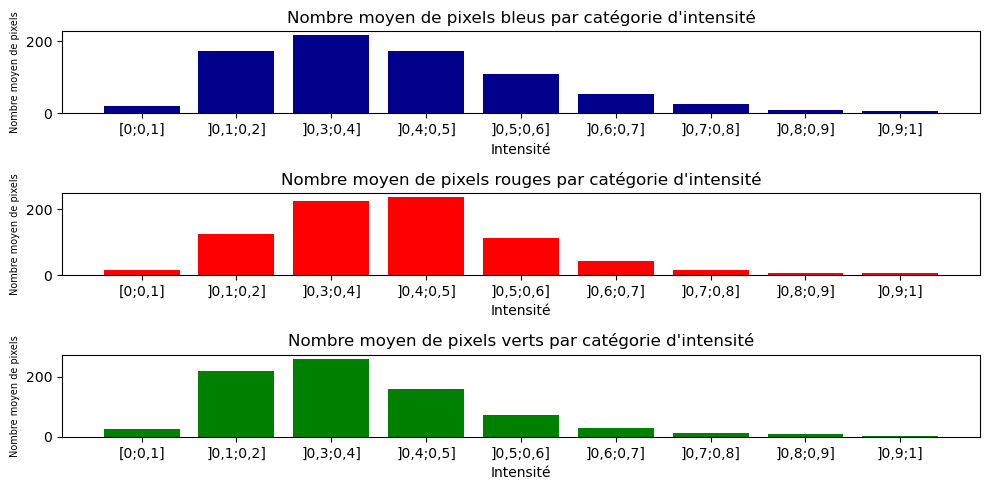

In [121]:
img=X_train_permute[0].numpy()

blue_histogram = cv2.calcHist([img], [0], None, [9], [0, 1])
red_histogram = cv2.calcHist([img], [1], None, [9], [0, 1])
green_histogram = cv2.calcHist([img], [2], None, [9], [0, 1]) 

for i in range(1, transformed_train_dataset.__len__()):
    img=X_train_permute[i].numpy()
    blue_histogram += cv2.calcHist([img], [0], None, [9], [0, 1])
    red_histogram += cv2.calcHist([img], [1], None, [9], [0, 1])
    green_histogram += cv2.calcHist([img], [2], None, [9], [0, 1]) 

fig, axs = plt.subplots(3, 1, figsize=(10, 5))

intensite=["[0;0,1]","]0,1;0,2]","]0,3;0,4]","]0,4;0,5]","]0,5;0,6]","]0,6;0,7]","]0,7;0,8]","]0,8;0,9]","]0,9;1]"]


axs[0].bar(intensite,blue_histogram.T[0]/transformed_train_dataset.__len__(), color="darkblue")
axs[0].set_title("Nombre moyen de pixels bleus par catégorie d'intensité")
axs[0].set_xlabel("Intensité")
axs[0].set_ylabel("Nombre moyen de pixels", size=7)

axs[1].bar(intensite, red_histogram.T[0]/(transformed_train_dataset.__len__()), color="red")
axs[1].set_title("Nombre moyen de pixels rouges par catégorie d'intensité")
axs[1].set_xlabel("Intensité")
axs[1].set_ylabel("Nombre moyen de pixels", size=7)

axs[2].bar(intensite,green_histogram.T[0]/(transformed_train_dataset.__len__()), color="green")
axs[2].set_title("Nombre moyen de pixels verts par catégorie d'intensité")
axs[2].set_xlabel("Intensité")
axs[2].set_ylabel("Nombre moyen de pixels", size=7)

fig.tight_layout()
plt.show()


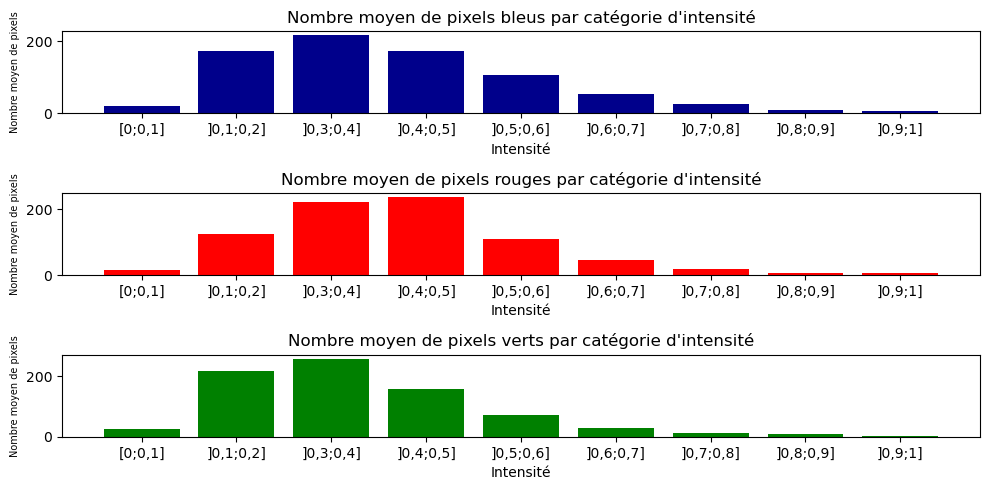

In [123]:
img=X_test_permute[0].numpy()

blue_histogram = cv2.calcHist([img], [0], None, [9], [0, 1])
red_histogram = cv2.calcHist([img], [1], None, [9], [0, 1])
green_histogram = cv2.calcHist([img], [2], None, [9], [0, 1]) 

for i in range(1, transformed_test_dataset.__len__()):
    img=X_test_permute[i].numpy()
    blue_histogram += cv2.calcHist([img], [0], None, [9], [0, 1])
    red_histogram += cv2.calcHist([img], [1], None, [9], [0, 1])
    green_histogram += cv2.calcHist([img], [2], None, [9], [0, 1]) 

fig, axs = plt.subplots(3, 1, figsize=(10, 5))

axs[0].bar(intensite,blue_histogram.T[0]/transformed_test_dataset.__len__(), color="darkblue")
axs[0].set_title("Nombre moyen de pixels bleus par catégorie d'intensité")
axs[0].set_xlabel("Intensité")
axs[0].set_ylabel("Nombre moyen de pixels", size=7)

axs[1].bar(intensite, red_histogram.T[0]/(transformed_test_dataset.__len__()), color="red")
axs[1].set_title("Nombre moyen de pixels rouges par catégorie d'intensité")
axs[1].set_xlabel("Intensité")
axs[1].set_ylabel("Nombre moyen de pixels", size=7)

axs[2].bar(intensite,green_histogram.T[0]/(transformed_test_dataset.__len__()), color="green")
axs[2].set_title("Nombre moyen de pixels verts par catégorie d'intensité")
axs[2].set_xlabel("Intensité")
axs[2].set_ylabel("Nombre moyen de pixels", size=7)

fig.tight_layout()
plt.show()